# K-Means Clustering for Private and Public Universities
___

## Introduction K-Means Clustering

Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

**K-Means clustering** is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

___

## The Data

[The datasets]('https://drive.google.com/file/d/15F1whj5W2_9y90TmjWBFTmAdiei7F0zC/view?usp=drive_link') used is data from public and private university in the USA which consists of 18 variables.
* **Private** A factor with levels No and Yes indicating private or public university
* **Apps** Number of applications received
* **Accept** Number of applications accepted
* **Enroll** Number of new students enrolled
* **Top10perc** Pct. new students from top 10% of H.S. class
* **Top25perc** Pct. new students from top 25% of H.S. class
* **F.Undergrad** Number of fulltime undergraduates
* **P.Undergrad** Number of parttime undergraduates
* **Outstate** Out-of-state tuition
* **Room.Board** Room and board costs
* **Books** Estimated book costs
* **Personal** Estimated personal spending
* **PhD** Pct. of faculty with Ph.D.’s
* **Terminal** Pct. of faculty with terminal degree
* **S.F.Ratio** Student/faculty ratio
* **perc.alumni** Pct. alumni who donate
* **Expend** Instructional expenditure per student
* **Grad.Rate** Graduation rate

## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# hide warning
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [268]:
df = pd.read_csv('College_Data')

In [269]:
# rename column name
df.rename(columns={'Unnamed: 0':'University'}, inplace=True)

In [270]:
df.head()

University Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [92]:
df.shape

(777, 19)

## Exploratory Data Analysis

In [17]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

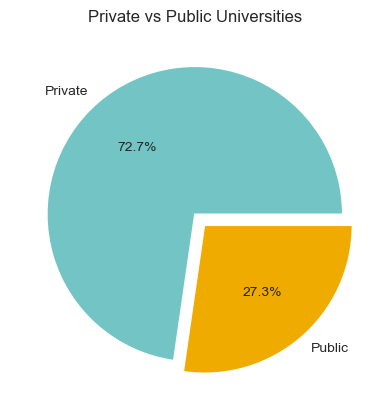

In [107]:
plt.pie(df['Private'].value_counts(), labels=['Private','Public'], autopct="%1.1f%%", explode=[0,0.1], colors=['#73C5C5','#F0AB00'])
plt.title('Private vs Public Universities');

In [186]:
num_var = df.select_dtypes(include=('int','float')).columns

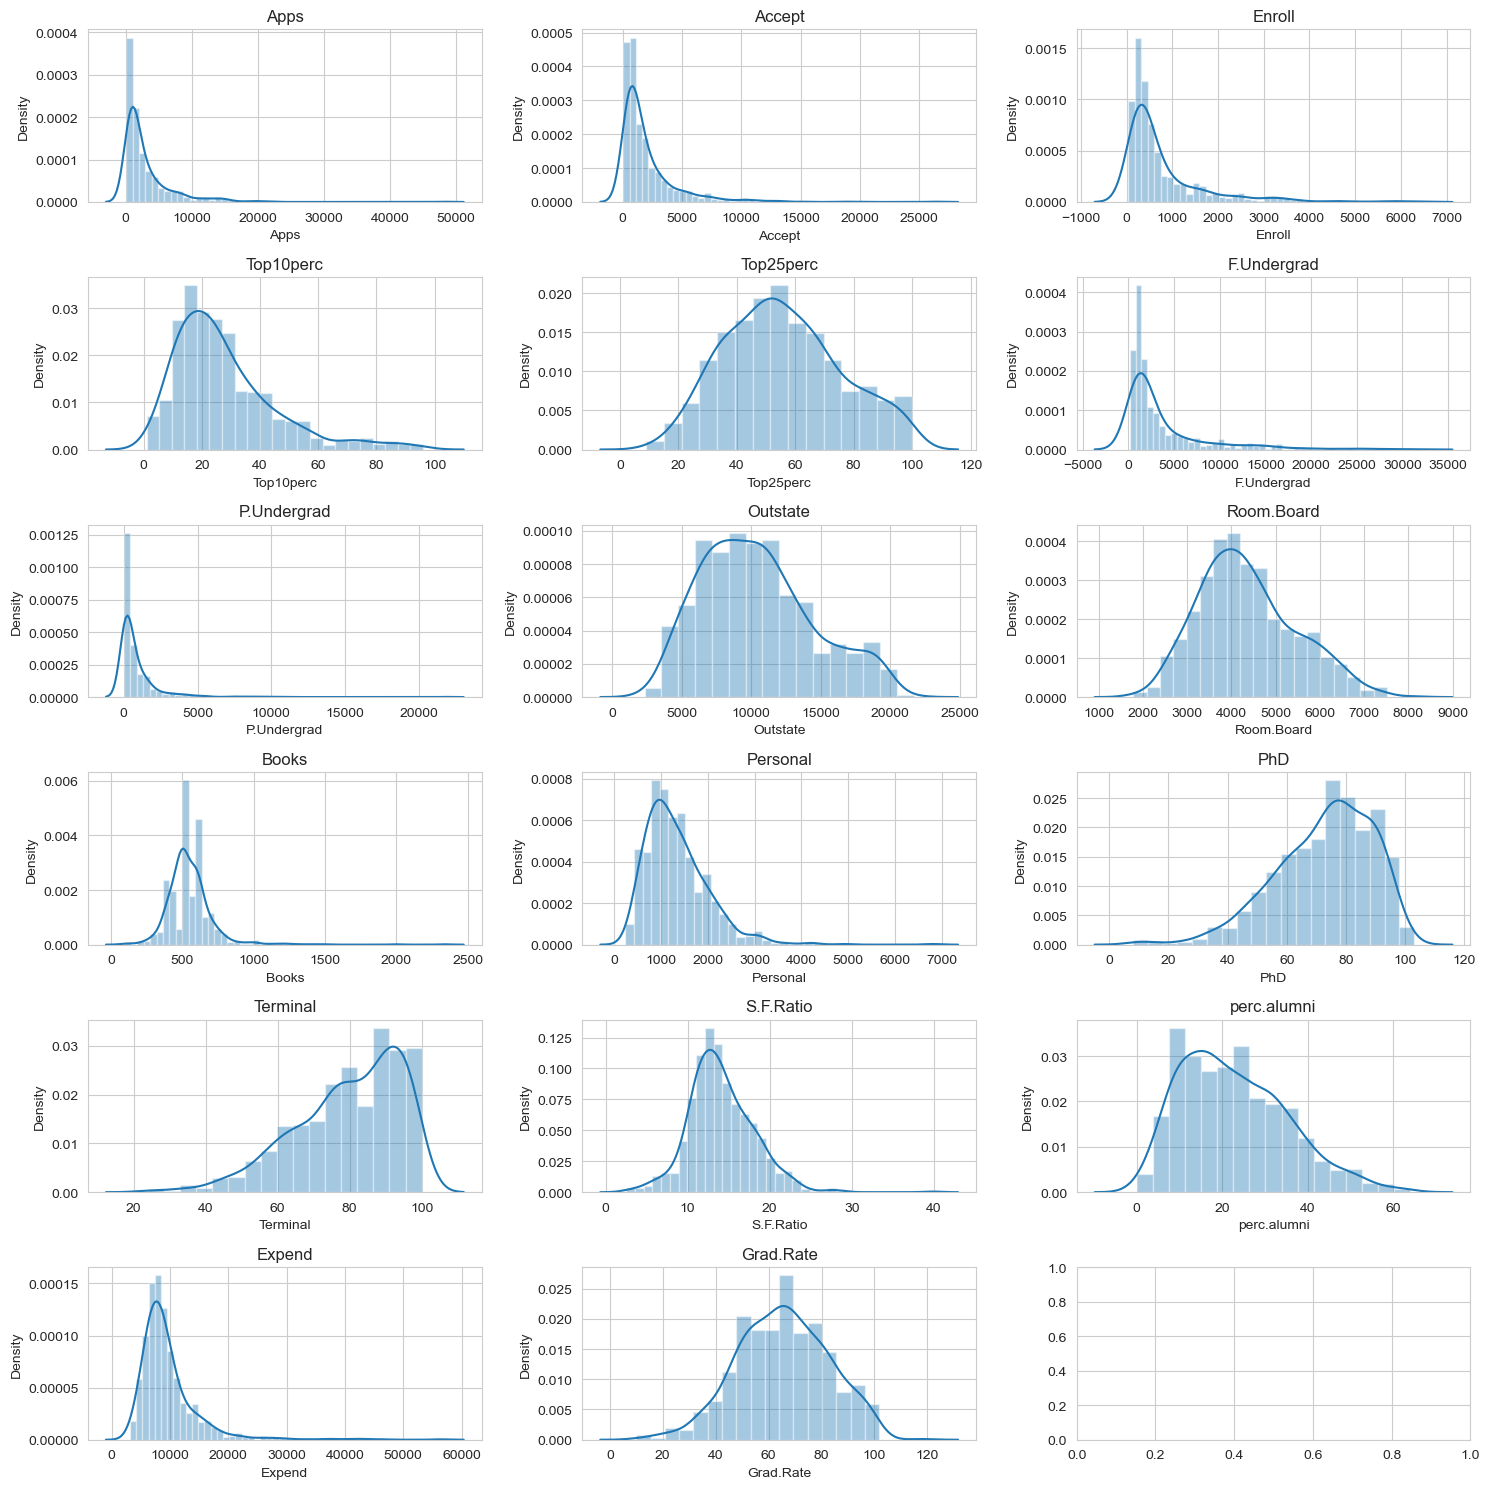

In [119]:
fig, axes = plt.subplots(6, 3, figsize=(15,15))    
axes = axes.flatten()

for ax, col in zip(axes, num_var):
  sns.distplot(df[col], ax = ax)
  ax.set_title(col)

fig.tight_layout()
plt.show()

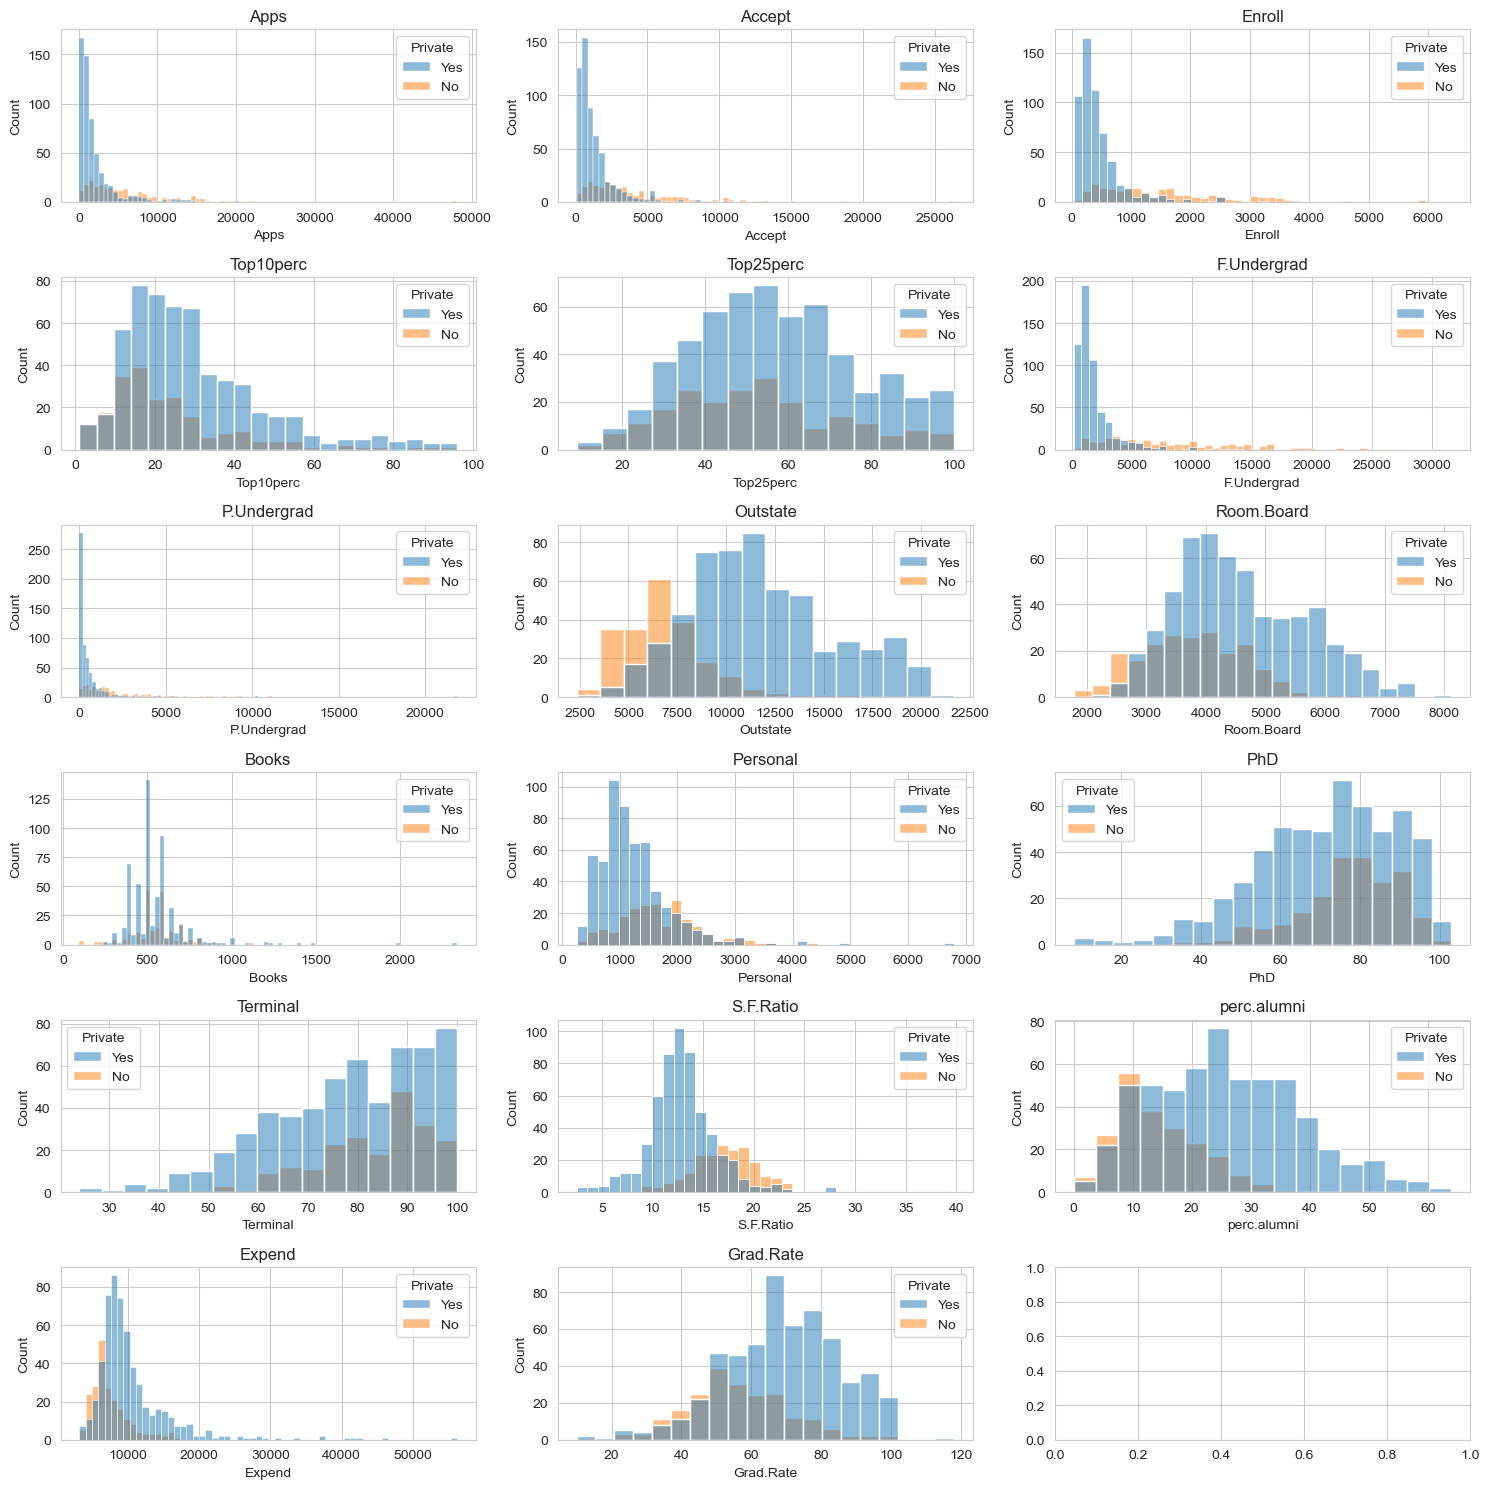

In [127]:
fig, axes = plt.subplots(6, 3, figsize=(15,15))    
axes = axes.flatten()

for ax, col in zip(axes, num_var):
  sns.histplot(data = df, x=col, ax = ax, hue='Private')
  ax.set_title(col)

fig.tight_layout()
plt.show()

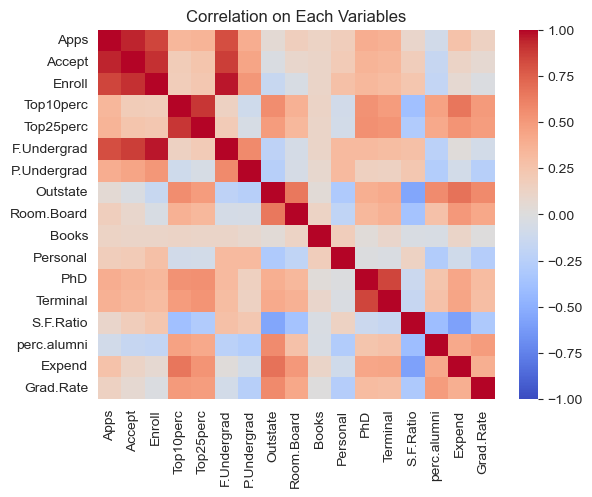

In [120]:
sns.heatmap(df[num_var].corr(), vmin=-1, cmap='coolwarm')
plt.title('Correlation on Each Variables');

The redder indicates that the variable relationship has a strong positive correlation. On the other hand, the bluer it is, it indicates that the variable relationship has a strong negative correlation.

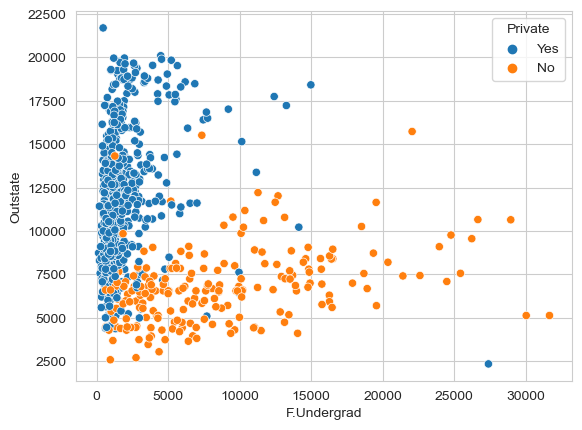

In [129]:
sns.scatterplot(df, y='Outstate', x='F.Undergrad', hue='Private');

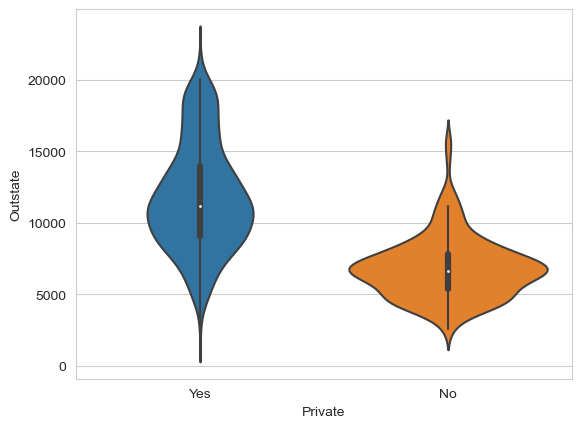

In [135]:
sns.violinplot(data=df, y='Outstate', x='Private');

The Average of out-of-state tuition for private university is larger than public university

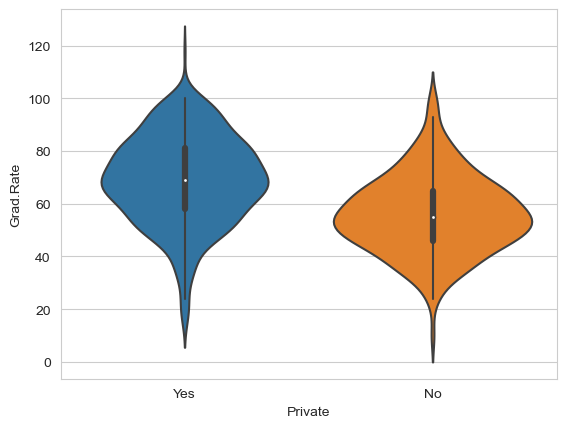

In [136]:
sns.violinplot(data=df,x='Private', y='Grad.Rate');

The average of graduation rate for private university is larger than public university

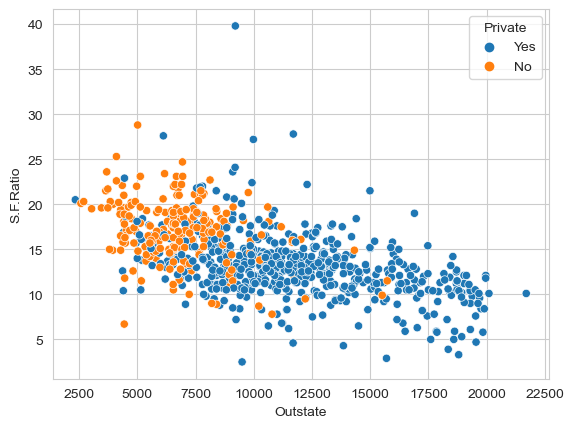

In [35]:
sns.scatterplot(df, x='Outstate', y='S.F.Ratio', hue='Private');

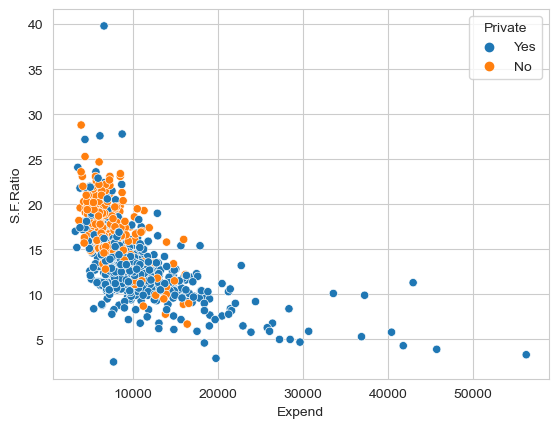

In [37]:
sns.scatterplot(df, x='Expend', y='S.F.Ratio', hue='Private');

In [138]:
# percentage average of accepted to applications
(df['Accept']/df['Apps']).mean()

0.7469277072775414

In [124]:
# percentage average of enroll to accepted
(df['Enroll']/df['Accept']).mean()

0.41201469046890854

## Data Preprocessing

### Detect missing value

In [271]:
df.isnull().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### Detect duplicate value

In [272]:
df.duplicated().sum()

0

### Detect outlier

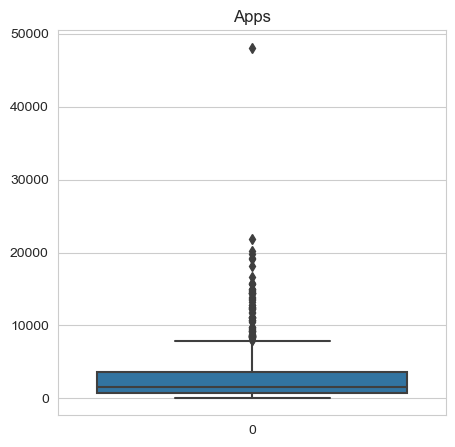

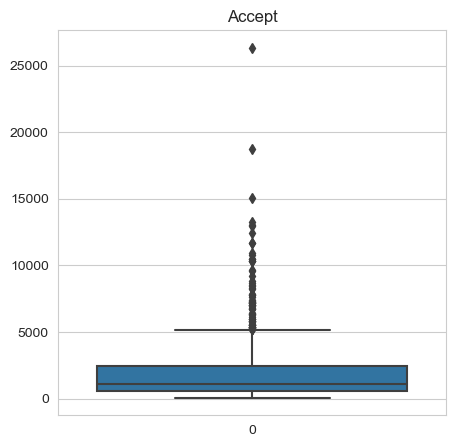

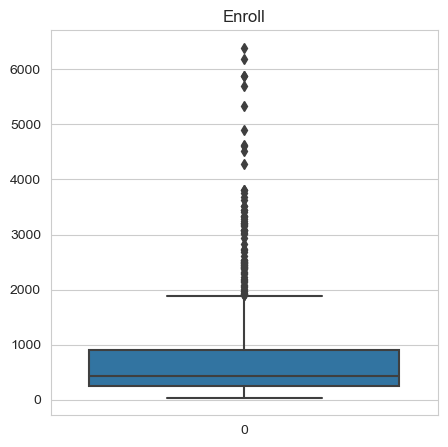

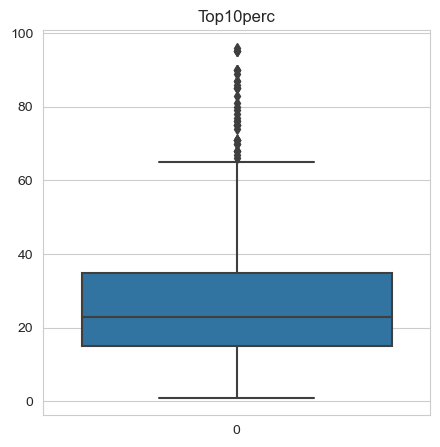

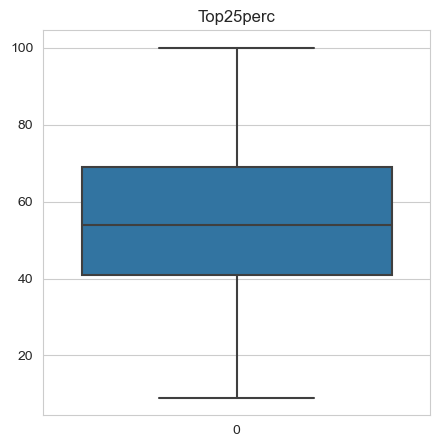

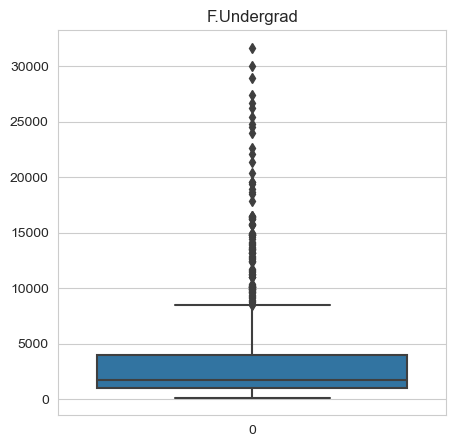

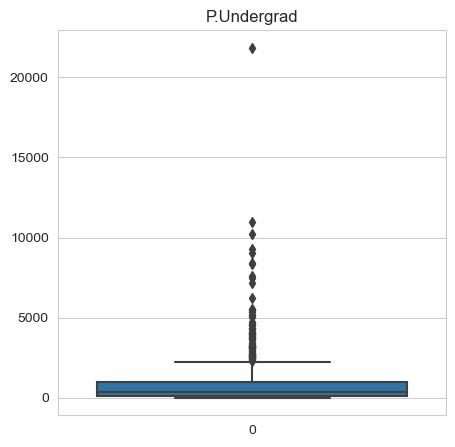

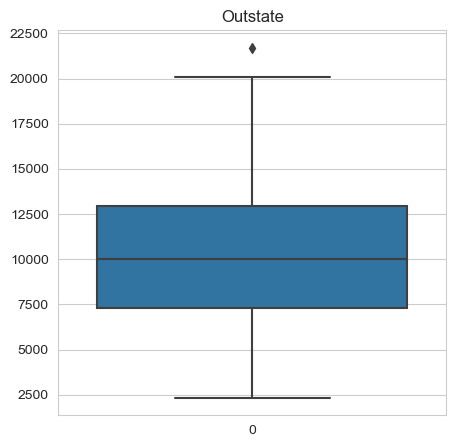

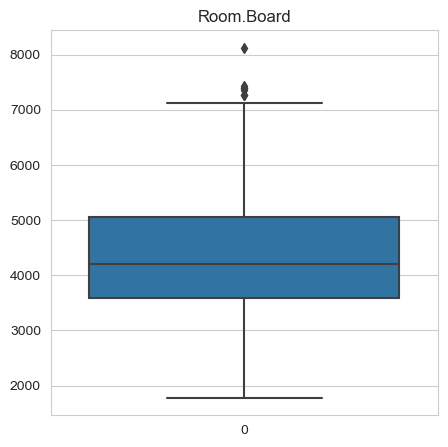

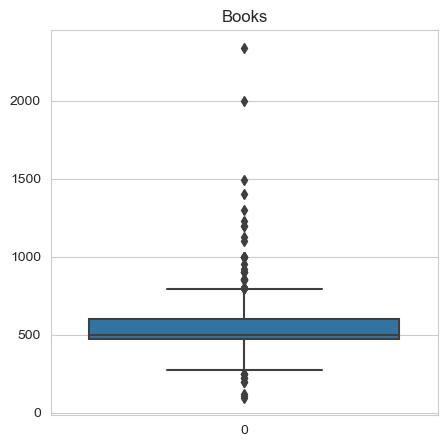

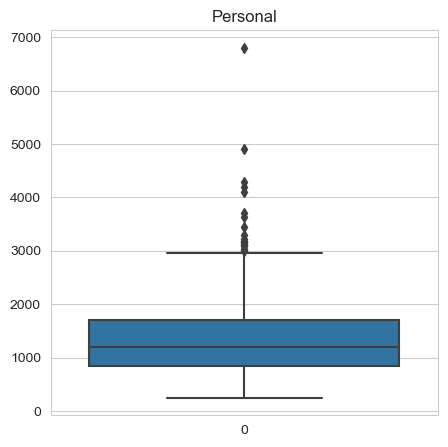

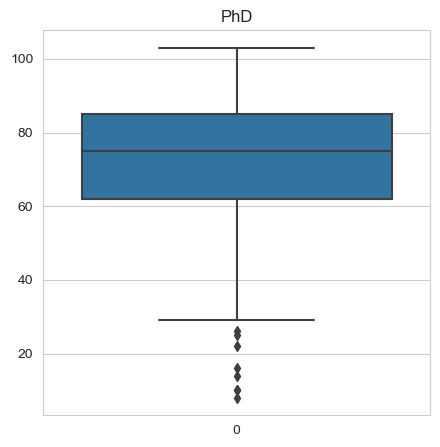

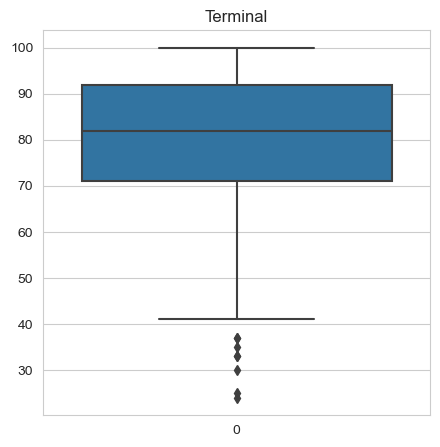

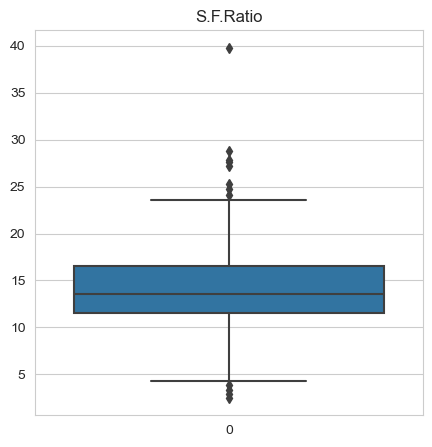

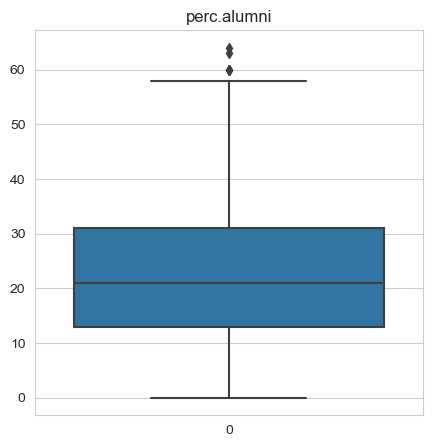

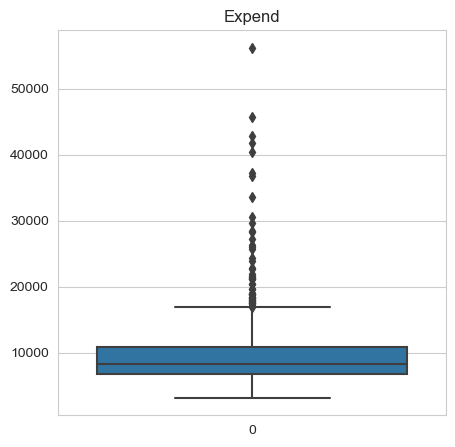

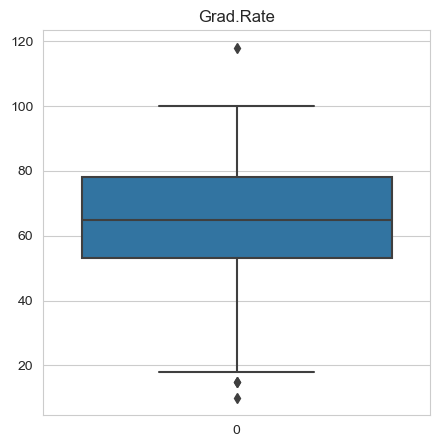

In [273]:
for i in num_var:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.title(i)
    
plt.show()

Because the outlier values here are still relevant, I did not remove the outliers but replace outlier with upper/lower bound.

In [274]:
def replace_outliers(df,columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df[col] = df[col].mask(df[col]< lower_bound, lower_bound,axis=0) #df[col].median()
        df[col] = df[col].mask(df[col]> upper_bound, upper_bound,axis=0)

    return df

In [275]:
df_clean = replace_outliers(df, num_var)

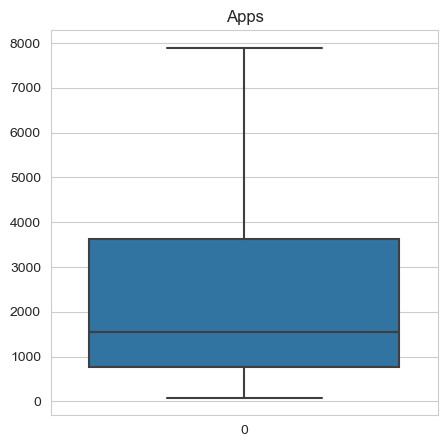

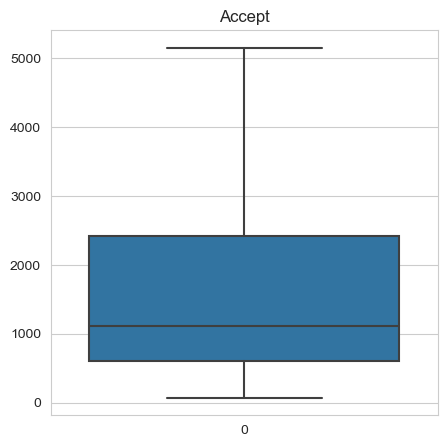

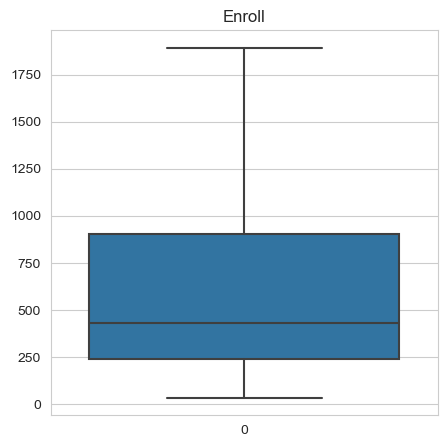

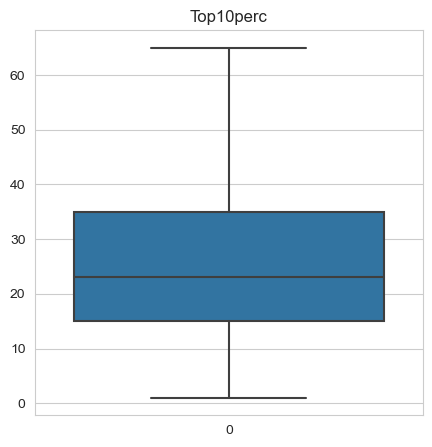

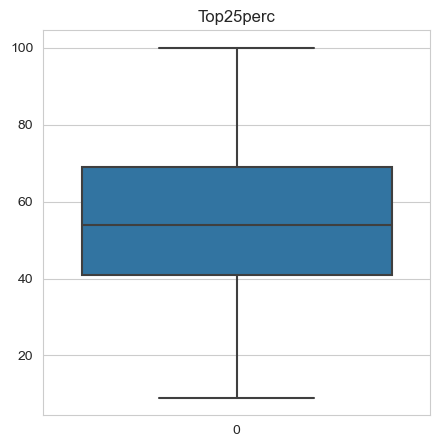

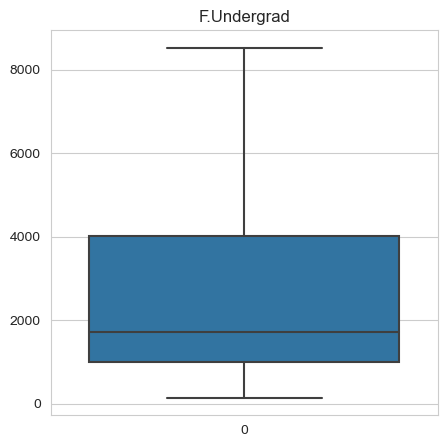

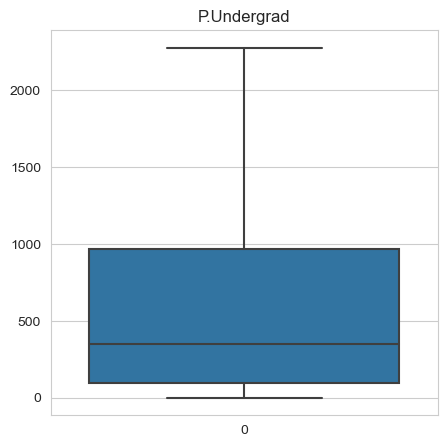

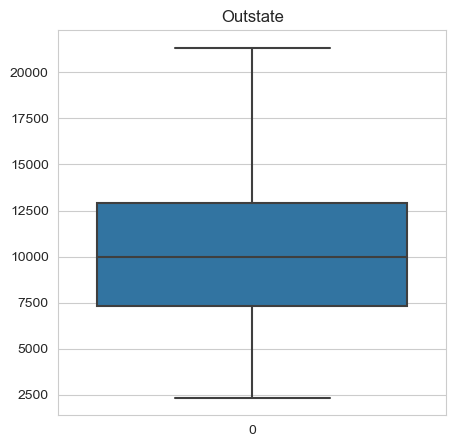

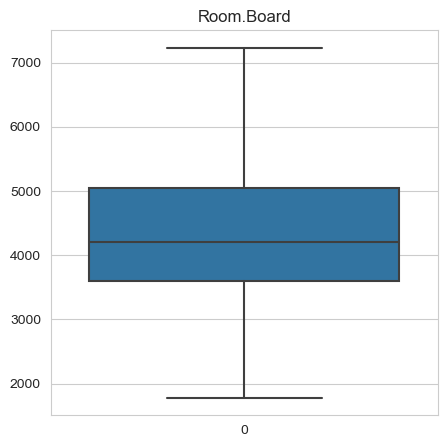

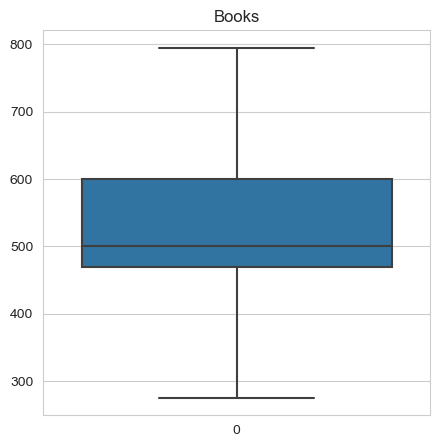

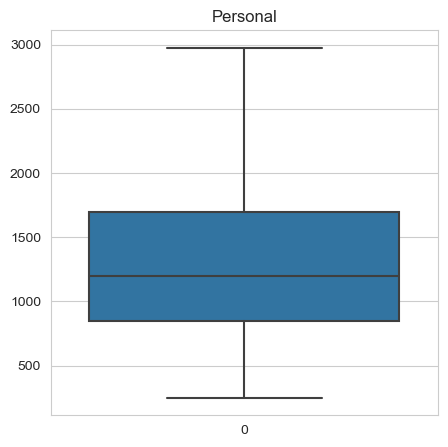

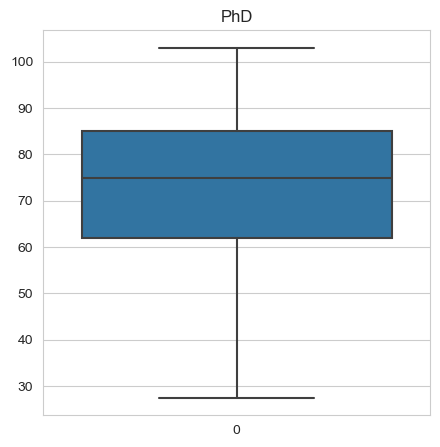

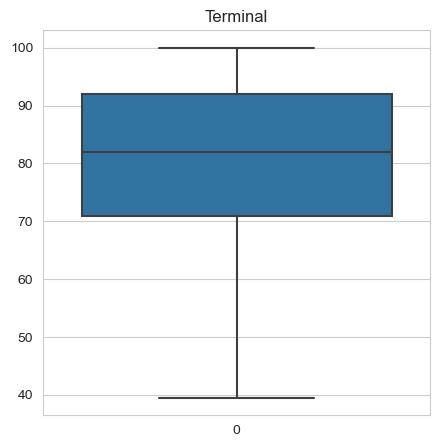

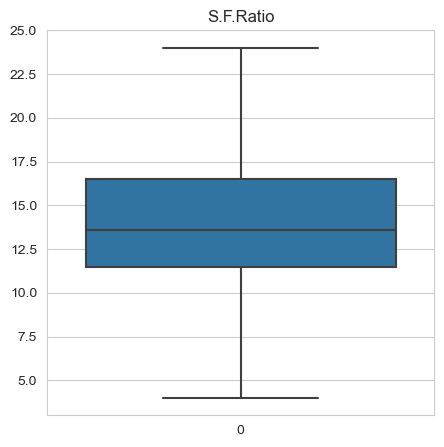

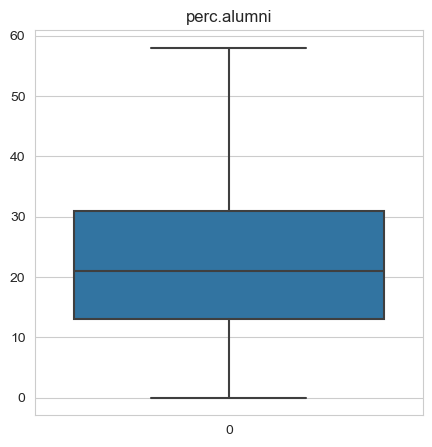

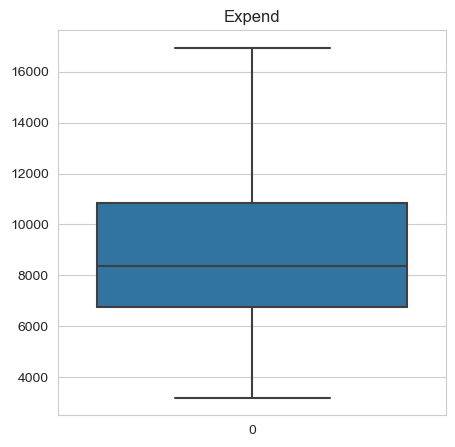

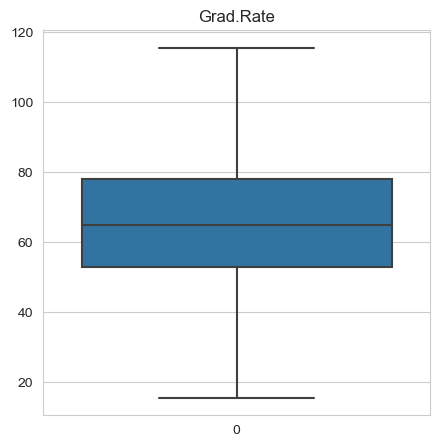

In [276]:
for i in num_var:
    plt.figure(figsize=(5,5))
    sns.boxplot(df_clean[i])
    plt.title(i)
    
plt.show()

### Remove unneeded variables

In [277]:
# drop variable university and private
df_clean = df_clean.drop(['University', 'Private'], axis=1)

In [278]:
df_clean.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52       2885.0          537   
1  2186    1924     512         16         29       2683.0         1227   
2  1428    1097     336         22         50       1036.0           99   
3   417     349     137         60         89        510.0           63   
4   193     146      55         16         44        249.0          869   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0    450      2200  70.0      78.0       18.1   
1   12280.0      6450.0    750      1500  29.0      39.5       12.2   
2   11250.0      3750.0    400      1165  53.0      66.0       12.9   
3   12960.0      5450.0    450       875  92.0      97.0        7.7   
4    7560.0      4120.0    795      1500  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0           12   7041.0       60.0  
1           16  10527.0       56.0  
2           30   8735.0       54.0  
3           37  16948.5       59.0  
4            2  10922.0       15.5

### Standardize the data

In [279]:
sc = StandardScaler()

In [280]:
trans = sc.fit_transform(df_clean)

In [281]:
df_clean = pd.DataFrame(trans,columns=num_var)

In [282]:
df_clean.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

## Clustering

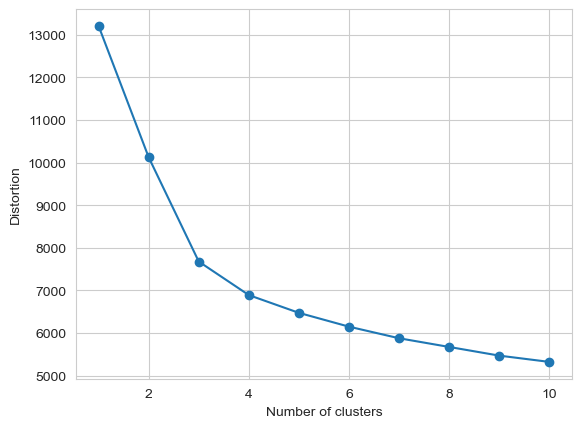

In [283]:
# Doing simulation to found the best K number
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_clean)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

I choose K=3 cause K>4 it look similar not significant.

In [284]:
km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)

In [285]:
clusters = km.fit(df_clean)

In [296]:
labels = km.labels_

In [297]:
labels = pd.Series(labels)

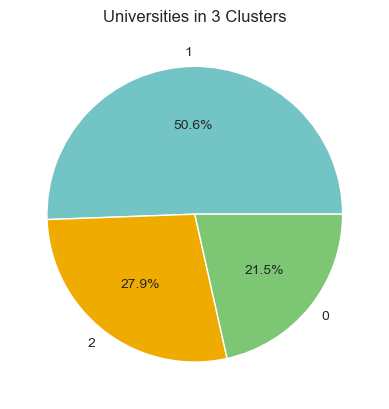

In [298]:
plt.pie(labels.value_counts(), autopct="%1.1f%%", labels=labels.unique(), colors=['#73C5C5','#F0AB00','#7CC674'])
plt.title('Universities in 3 Clusters');

In [299]:
df['Clusters'] = labels

In [302]:
# University based on its clusters
df[['University', 'Clusters']]

University  Clusters
0      Abilene Christian University         1
1                Adelphi University         1
2                    Adrian College         1
3               Agnes Scott College         2
4         Alaska Pacific University         1
..                              ...       ...
772         Worcester State College         1
773               Xavier University         1
774  Xavier University of Louisiana         1
775                 Yale University         2
776    York College of Pennsylvania         1

[777 rows x 2 columns]

## Characteristics of each clusters

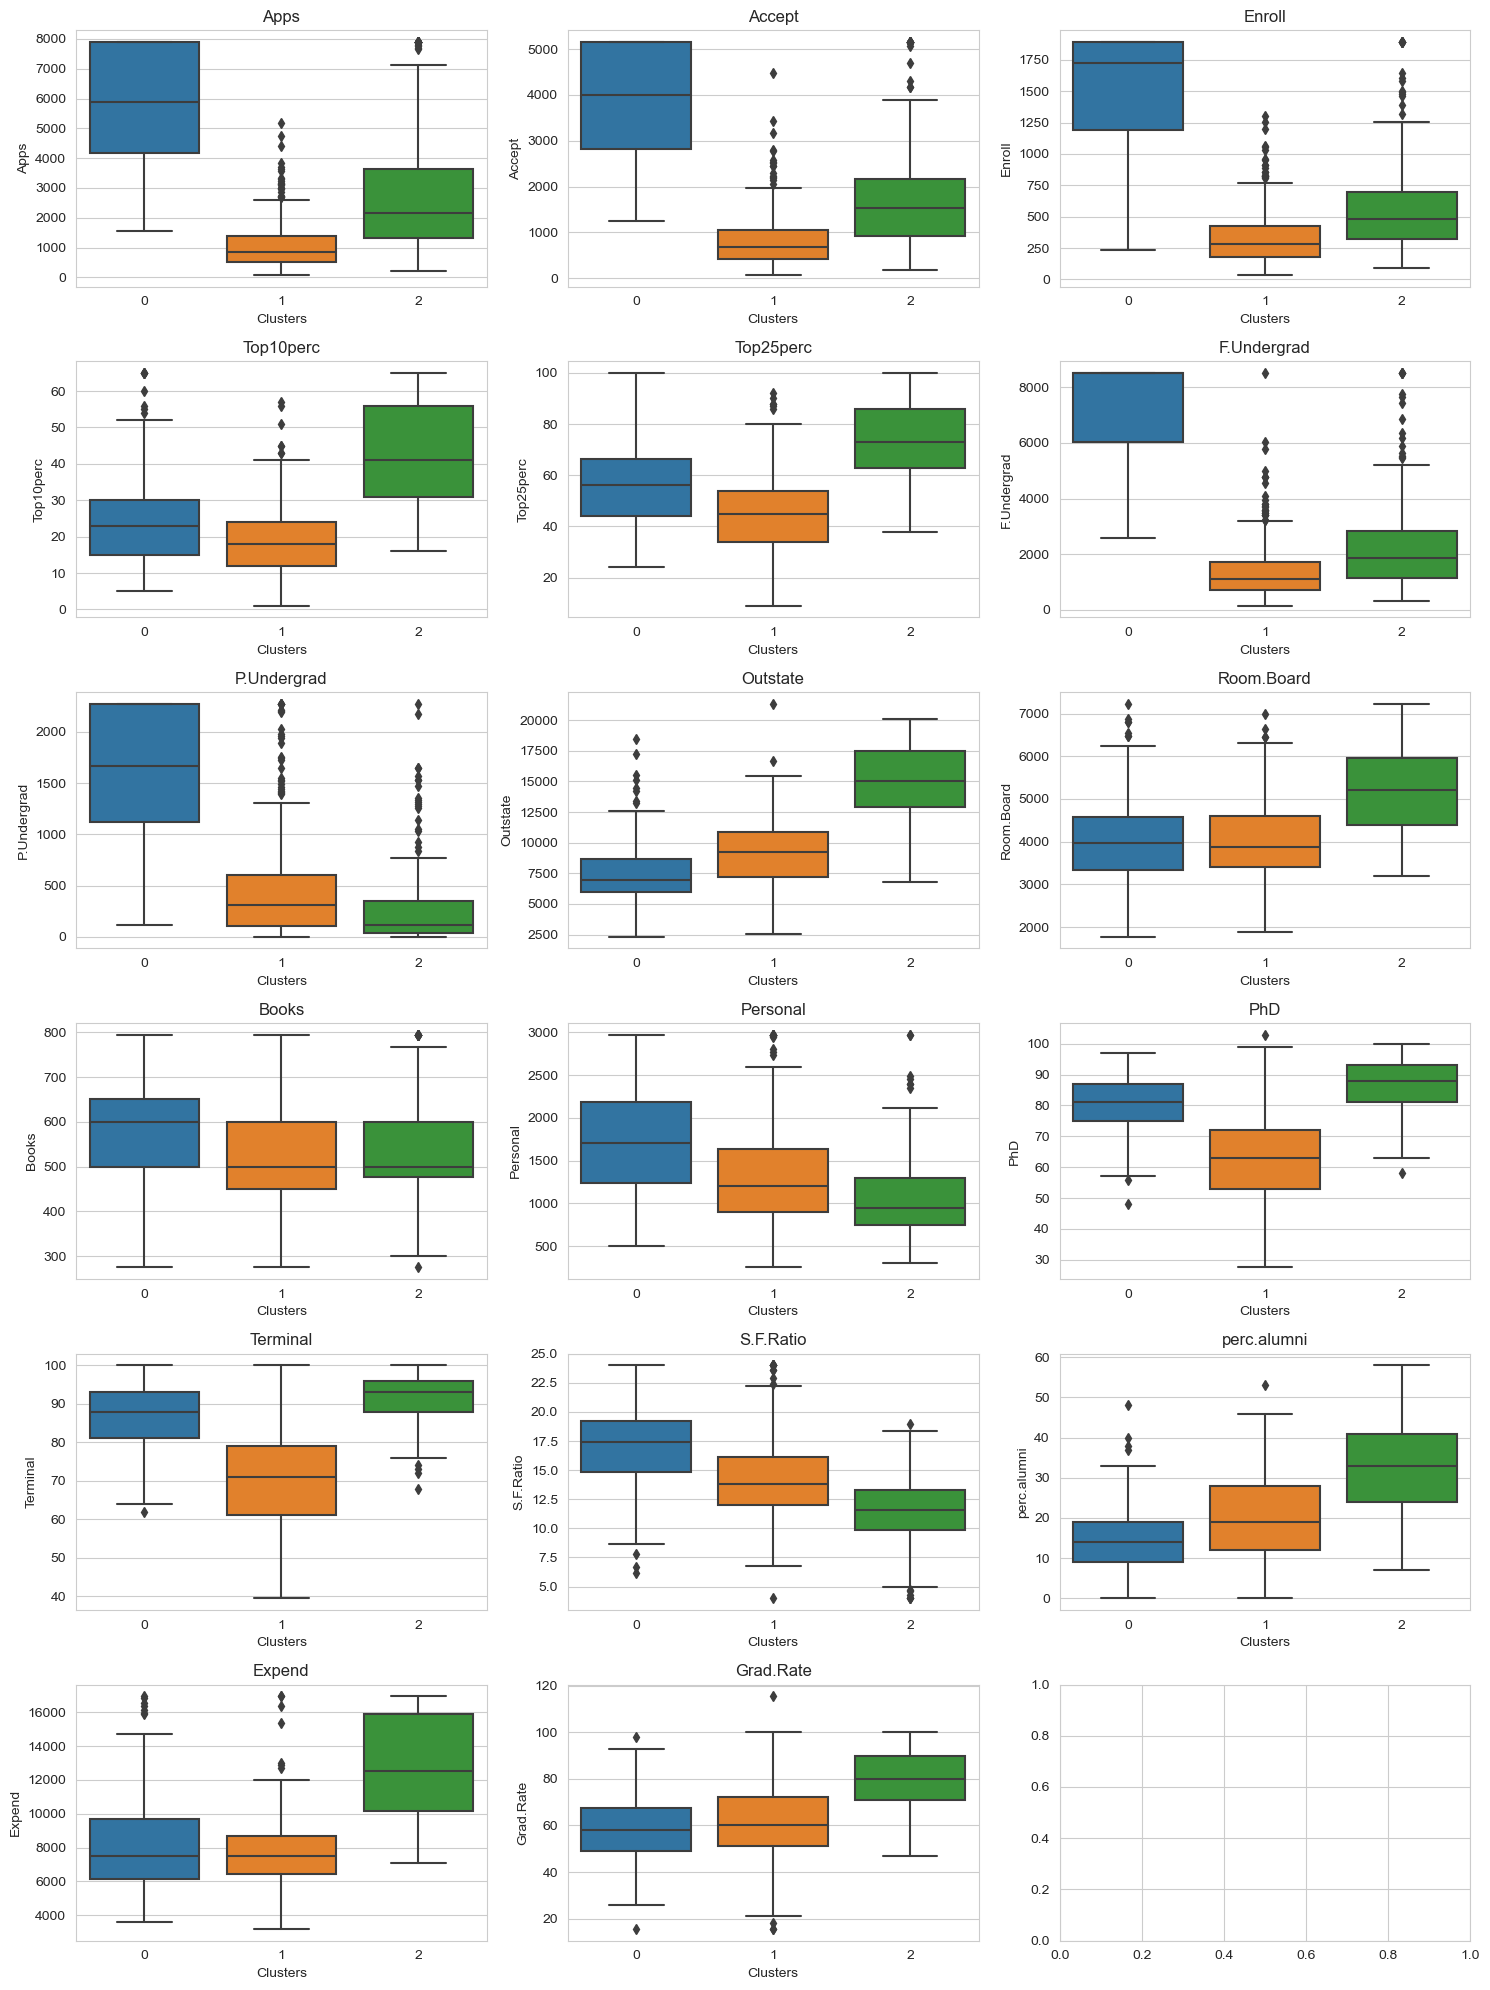

In [301]:
fig, axes = plt.subplots(6, 3, figsize=(15,20))    
axes = axes.flatten()

for ax, col in zip(axes, num_var):
  sns.boxplot(data = df, y=col, ax = ax, x='Clusters')
  ax.set_title(col)

fig.tight_layout()
plt.show()

**Characteristics of each clusters:**

* Cluster 0 universities have the highest number of applications, acceptances, and new students enrolled, far above other clusters. Then followed by cluster 2 universities and cluster 1 universities.
* Cluster 2 universities are most popular with students from the top 10% of high schools and the top 20% of high schools, followed by cluster 0 universities, and finally cluster 1 universities.
* Cluster 0 universities have a much higher number of part-time and full-time undergraduates than other clusters.
* Cluster 2 universities are the most expensive for Out-of-state tuition and Room and board costs
* The three university clusters have similar book costs and personal spending, but cluster 0 is slightly more expensive
* Cluster 2 universities have the highest percentage of PhDs and terminal degrees, followed by cluster 0 universities, and finally cluster 1.
* Cluster 0 universities have the highest student/faculty ratio, followed by cluster 1 universities, and the lowest are cluster 2 universities
* Cluster 2 universities have the highest percentage of alumni who donate, namely 30%, compared to other clusters which are still below 20%
* Cluster 2 universities are the most expensive for Instructional expenditure per student reaches 12,000 USD compared to only around 8,000 USD for other clusters
* Cluster 2 universities have the highest graduation rate at 80%, while the average for other clusters is only 60%


# Thank You